## Reegression - Housing Prices

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
os.chdir('/Users/a0k01n7/Documents/Kaggle/house-prices-advanced-regression-techniques/')

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(data.head())
print('\n')
print(data.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




(1460, 81)


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
display(data.iloc[:,0:20].head())
print('\n')
display(data.iloc[:,20:40].head())
print('\n')
display(data.iloc[:,40:60].head())
print('\n')
display(data.iloc[:,60:data.shape[1]+1].head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000


,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA
1,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA
2,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA
3,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA
4,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA


,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
0,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0
1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0
2,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0
3,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0
4,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0


,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RFn,2,548,TA,TA,Y,0,61,0,0,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,RFn,2,460,TA,TA,Y,298,0,0,0,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,RFn,2,608,TA,TA,Y,0,42,0,0,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,Unf,3,642,TA,TA,Y,0,35,272,0,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,RFn,3,836,TA,TA,Y,192,84,0,0,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.drop(['Id'], axis = 1, inplace= True)
test.drop(['Id'], axis = 1, inplace = True)

In [7]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness : 1.8829
Kurtosis : 6.5363


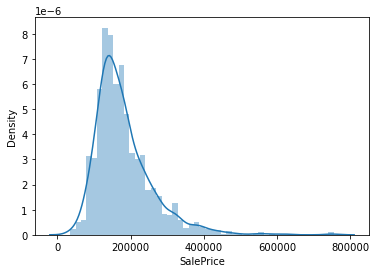

In [8]:
sns.distplot(data['SalePrice'])
print('Skewness :', data['SalePrice'].skew().round(4))
print('Kurtosis :', data['SalePrice'].kurt().round(4))

## Data Prrocessing
### Outlier Detection

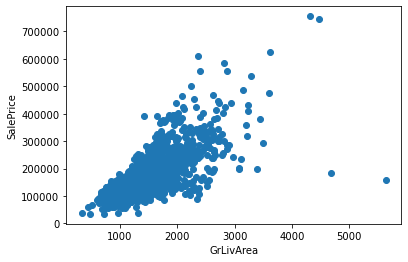

In [9]:
plt.scatter(x= data['GrLivArea'], y = data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

#### Deleting Outliers

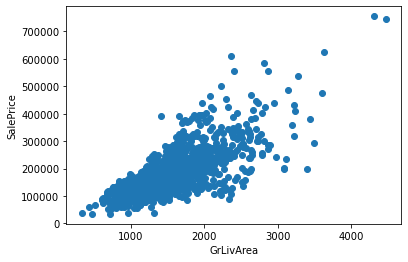

In [10]:
# Drop Outliers
data=data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice'] < 300000)].index)

plt.scatter(x= data['GrLivArea'], y = data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### Target Variable

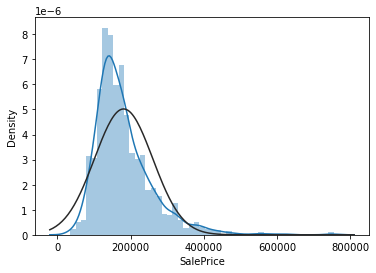

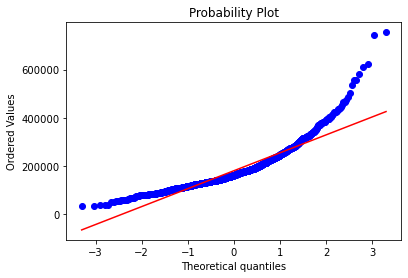


mu = 180932.92 and sigma = 79467.79


In [11]:
# Distribution plot
sns.distplot(data['SalePrice'], fit= norm)
plt.show()

# QQ plot
stats.probplot(data['SalePrice'], plot=plt)
plt.show()

# Fitted parameters
mu, sigma = norm.fit(data['SalePrice'])
print('\nmu = {:.2f} and sigma = {:.2f}' .format(mu, sigma))


### Log tansformation of target variable

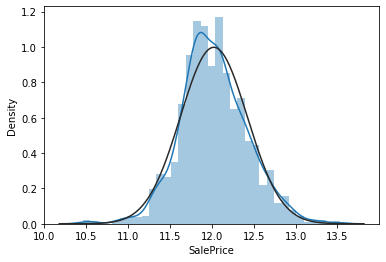

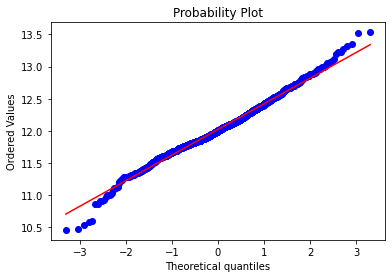


mu = 12.02 and sigma = 0.40


In [12]:
data['SalePrice'] = np.log1p(data['SalePrice'])
# Distribution plot
sns.distplot(data['SalePrice'], fit= norm)
plt.show()

# QQ plot
stats.probplot(data['SalePrice'], plot=plt)
plt.show()

# Fitted parameters
mu, sigma = norm.fit(data['SalePrice'])
print('\nmu = {:.2f} and sigma = {:.2f}' .format(mu, sigma))


## Feature Engineering

Bind train and test set.

In [13]:
ntrain = data.shape[0]
ntest = data.shape[1]
y_train = data['SalePrice'].values
all_data = pd.concat((data, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
print('Shape : ', all_data.shape)

Shape :  (2917, 79)


### Missing Data

In [14]:
all_data_na = (all_data.isnull().sum()/all_data.shape[0]).sort_values(ascending= False)
all_data_na= all_data_na.drop(all_data_na[all_data_na==0].index)
missing_data = pd.DataFrame({'missing_ratio':all_data_na})
missing_data.head()

,missing_ratio
PoolQC,0.996915
MiscFeature,0.964004
Alley,0.932122
Fence,0.804251
FireplaceQu,0.486802


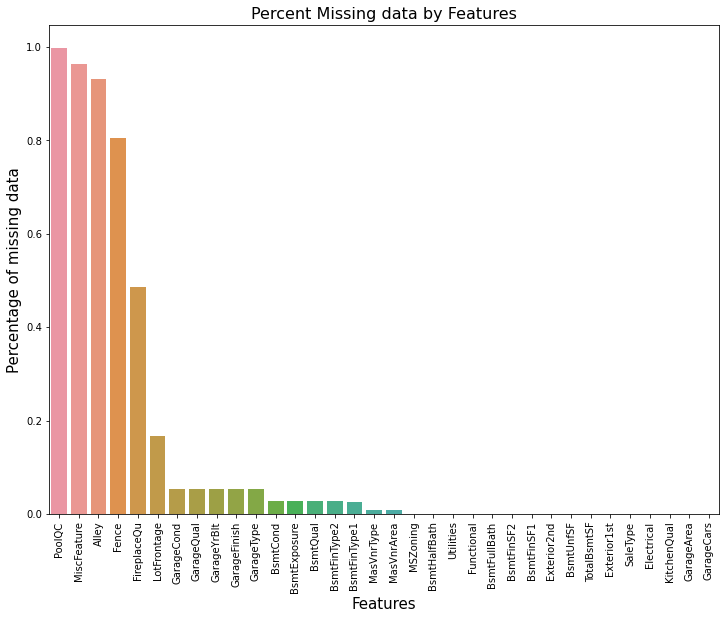

In [15]:
plt.subplots(figsize = (12,9))
plt.xticks(rotation = '90')
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percentage of missing data', fontsize= 15)
plt.title('Percent Missing data by Features', fontsize=16)
plt.show()

## Data Correlation

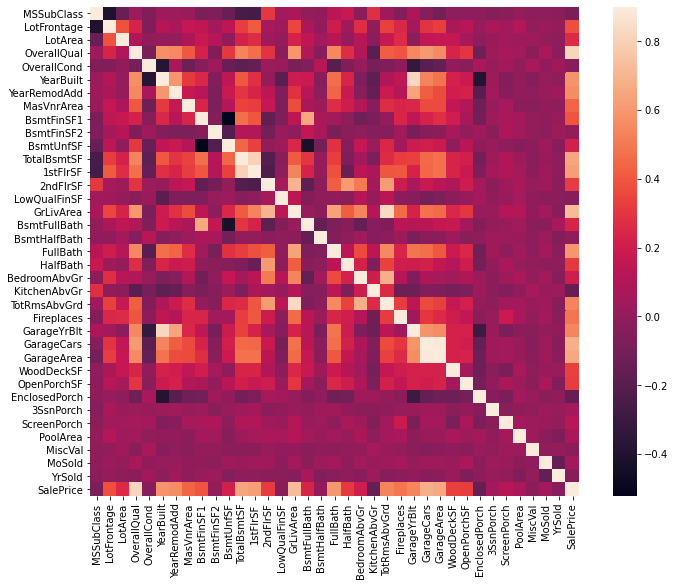

In [16]:
# Correlation map to see how features are related to the target variable
plt.subplots(figsize = (12,9))
corr_mat = data.corr()
sns.heatmap(corr_mat, vmax = 0.9, square= True)
plt.show()

### Imputing Missing Values
Values are imputed based on their deescription in the dataset oveerview.

In [17]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')  # Na means no pool
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None') # NA means no misc features
all_data['Alley'] = all_data['Alley'].fillna('None') # NA means no alley access
all_data['Fence'] = all_data['Fence'].fillna('None') # NA means no fence
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None') # NA means no fireplace
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))  # Filling NA with LotFrontage values of neighborhood

# Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
# Replacing missing data with 0 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
# Replacing missing values with 0, implying no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

# No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
# No Masonary 
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

# Replacing missing with most common zonning
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Dropping utilities column 
all_data = all_data.drop(['Utilities'], axis=1)

# Replacing with most common values
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

# Replacing with None, implying No building class
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

# Replacing NA with typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [18]:
all_data_na = (all_data.isnull().sum()/all_data.shape[0]).sort_values(ascending= False)
all_data_na= all_data_na.drop(all_data_na[all_data_na==0].index)
missing_data = pd.DataFrame({'missing_ratio':all_data_na})
missing_data.head()

,missing_ratio


### Feature Engineering - transform variables

In [19]:
# Transforming numerical variables that are categorical

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [20]:
# Label encoding categorical variables
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [21]:
# Adding total square footage data 
all_data['TotalSF'] = all_data['TotalBsmtSF']+ all_data['1stFlrSF']+ all_data['2ndFlrSF']

### Skewed Features

In [22]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
numeric_features

skewed_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending= False)
skewed_df = pd.DataFrame({'Skew':skewed_features})
skewed_df.head()

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080


#### Box-Cox transformation of highly skewed data

In [23]:
skewed_df = skewed_df[abs(skewed_df)>0.75]
print('There are {} skewed variables that are passed through Box-cox transformation'.format(skewed_df.shape[0]))
skewed_features = skewed_df.index
lam = 0.15
from scipy.special import boxcox1p
for features in skewed_features:
    all_data[features] = boxcox1p(all_data[features], lam)


There are 59 skewed variables that are passed through Box-cox transformation


#### Get dummy categorical features

In [24]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)
print(all_data.head())

(2917, 220)
   MSSubClass  LotFrontage    LotArea    Street     Alley  LotShape  \
0    2.885846     5.831328  19.212182  0.730463  0.730463  1.540963   
1    2.055642     6.221214  19.712205  0.730463  0.730463  1.540963   
2    2.885846     5.914940  20.347241  0.730463  0.730463  0.000000   
3    3.011340     5.684507  19.691553  0.730463  0.730463  0.000000   
4    2.885846     6.314735  21.325160  0.730463  0.730463  0.000000   

   LandSlope  OverallQual  OverallCond  YearBuilt  ...  SaleType_ConLw  \
0        0.0     2.440268     1.820334  14.187527  ...               0   
1        0.0     2.259674     2.440268  14.145138  ...               0   
2        0.0     2.440268     1.820334  14.184404  ...               0   
3        0.0     2.440268     1.820334  14.047529  ...               0   
4        0.0     2.602594     1.820334  14.182841  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1     

In [25]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modeling

In [28]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb

In [30]:
# Define cross validation strategy
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring= 'neg_mean_squared_error', cv = kf))
    return(rmse)

In [33]:
# Lasso Regressiion
lasso = make_pipeline(RobustScaler(), Lasso(alpha= 0.0005, random_state= 1))
# Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha= 0.0005, l1_ratio= 0.9, random_state = 3))
# Kernel Ridge Regression
KRR = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0 = 2.5)
# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt',
                                  min_samples_leaf = 15, min_samples_split = 10, loss = 'huber', random_state = 5)


In [37]:
score_lasso = rmsle_cv(lasso)
score_enet = rmsle_cv(ENet)
score_krr = rmsle_cv(KRR)
score_gb = rmsle_cv(GBoost)

print("\nLasso score: {:.4f} ({:.4f})\n".format(score_lasso.mean(), score_lasso.std()))
print("\nENet score: {:.4f} ({:.4f})\n".format(score_enet.mean(), score_enet.std()))
print("\nKRR score: {:.4f} ({:.4f})\n".format(score_krr.mean(), score_krr.std()))
print("\nGB score: {:.4f} ({:.4f})\n".format(score_gb.mean(), score_gb.std()))



Lasso score: 0.1115 (0.0074)


ENet score: 0.1116 (0.0074)


KRR score: 0.1153 (0.0075)


GB score: 0.1167 (0.0083)



### Create Average base model score

In [38]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [39]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0077)

